## Normality Tests

### Benchmark Case

In [549]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

### Real World Data

In [550]:
import pandas as pd
import yfinance as yf

In [551]:
# input
symbols = ['SPY','AAPL','MSFT','GLD']
start = '2000-01-01'
end = '2020-11-26'

# Read data 
data = yf.download(symbols,start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [552]:
data.head()

,AAPL,GLD,MSFT,SPY
Date,,,,
2000-01-03,0.855168,NaN,37.102634,98.564461
2000-01-04,0.783068,NaN,35.849308,94.709984
2000-01-05,0.794528,NaN,36.227283,94.879379
2000-01-06,0.725771,NaN,35.013741,93.354584
2000-01-07,0.760149,NaN,35.471302,98.776245


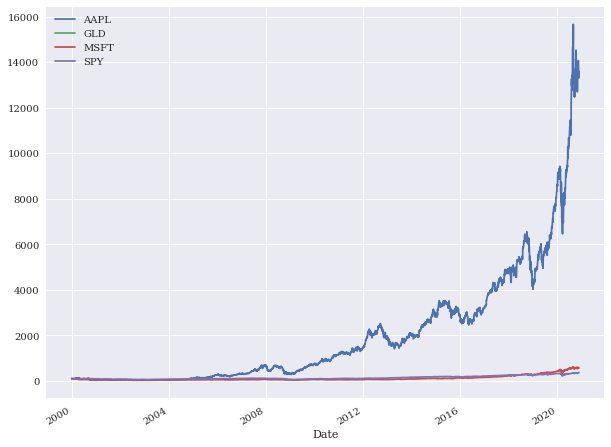

In [553]:
(data / data.iloc[0] * 100).plot(figsize=(10, 8))
# plt.savefig('../../images/ch13/stat_07.png');

In [554]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,AAPL,GLD,MSFT,SPY
Date,,,,
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,-0.088078,NaN,-0.034364,-0.039891
2000-01-05,0.014528,NaN,0.010488,0.001787
2000-01-06,-0.090514,NaN,-0.034072,-0.016201
2000-01-07,0.046281,NaN,0.012983,0.056452


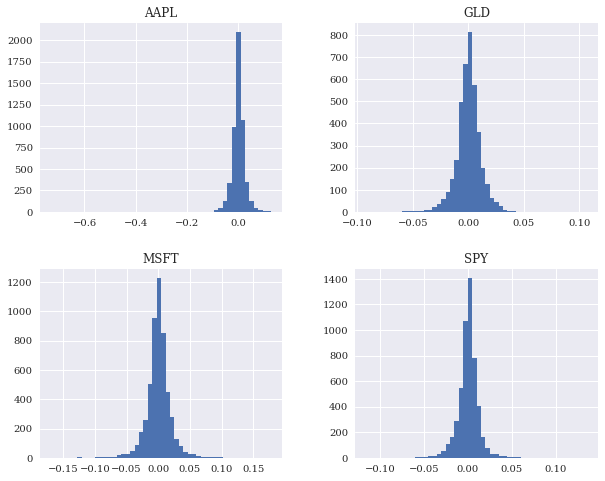

In [555]:
log_returns.hist(bins=50, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_08.png');

In [556]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)  


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      5259.00000
           min        -0.11589
           max         0.13558
          mean         0.00025
           std         0.01257
          skew        -0.25375
      kurtosis        11.73463

Results for symbol AAPL
------------------------------
     statistic           value
------------------------------
          size      5259.00000
           min        -0.73125
           max         0.13019
          mean         0.00093
           std         0.02660
          skew        -4.11226
      kurtosis       112.17959

Results for symbol MSFT
------------------------------
     statistic           value
------------------------------
          size      5259.00000
           min        -0.16958
           max         0.17869
          mean         0.00033
           std         0.01952
          skew        -0.16327
      kurtosis         9.83

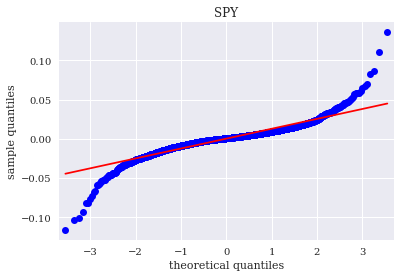

In [557]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');
# plt.savefig('../../images/ch13/stat_09.png');

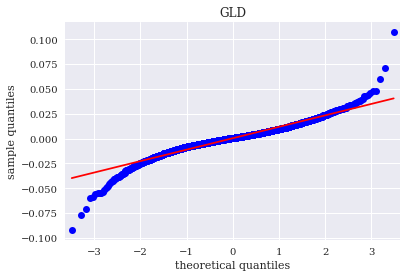

In [558]:
sm.qqplot(log_returns['GLD'].dropna(), line='s')
plt.title('GLD')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');
# plt.savefig('../../images/ch13/stat_10.png');

In [559]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)  


Results for symbol SPY
--------------------------------
Skew of data set          -0.254
Skew test p-value          0.000
Kurt of data set          11.735
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL
--------------------------------
Skew of data set          -4.112
Skew test p-value          0.000
Kurt of data set         112.180
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set          -0.163
Skew test p-value          0.000
Kurt of data set           9.836
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set          -0.324
Skew test p-value          0.000
Kurt of data set           6.249
Kurt test p-value          0.000
Norm test p-value          0.000


## Portfolio Optimization

### The Data

In [560]:
symbols = ['SPY', 'GLD', 'AAPL', 'MSFT']  

In [561]:
noa = len(symbols)  

In [562]:
data = yf.download(symbols,start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [563]:
rets = np.log(data / data.shift(1))

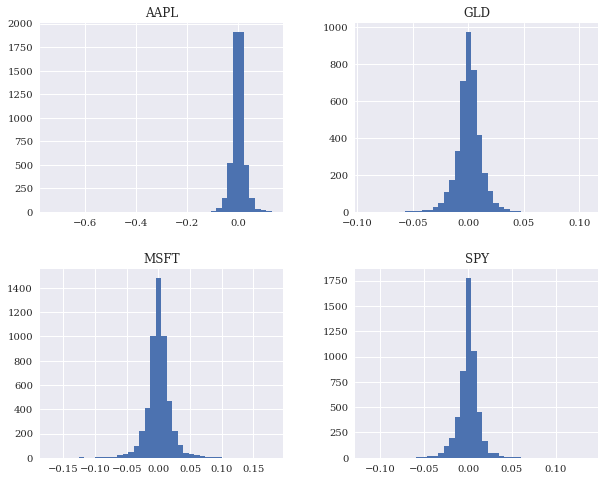

In [564]:
rets.hist(bins=40, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_11.png')

In [565]:
rets.mean() * 252  

AAPL    0.235291
GLD     0.083737
MSFT    0.083937
SPY     0.062425
dtype: float64

In [566]:
rets.cov() * 252  

,AAPL,GLD,MSFT,SPY
AAPL,0.178305,-0.000270,0.058418,0.044485
GLD,-0.000270,0.033397,0.000510,0.001395
MSFT,0.058418,0.000510,0.096011,0.042651
SPY,0.044485,0.001395,0.042651,0.039788


### The Basic Theory

In [567]:
weights = np.random.random(noa)  
weights /= np.sum(weights)  

In [568]:
weights

array([0.37869162, 0.04834575, 0.19787011, 0.37509252])

In [569]:
weights.sum()

0.9999999999999999

In [570]:
np.sum(rets.mean() * weights) * 252  

0.13317499591306914

In [571]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  

0.06277922866295885

In [572]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  

0.25055783496621864

In [573]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [574]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [575]:
prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

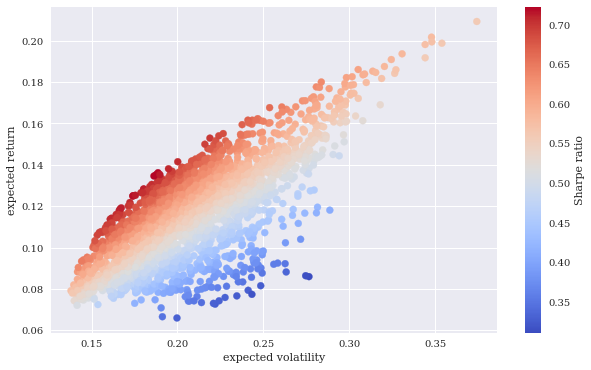

In [576]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
# plt.savefig('../../images/ch13/stat_12.png')

### Portfolio Optimizations

In [577]:
import scipy.optimize as sco

In [578]:
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [579]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [580]:
bnds = tuple((0, 1) for x in range(noa))  

In [581]:
eweights = np.array(noa * [1. / noa,])  
eweights  

array([0.25, 0.25, 0.25, 0.25])

In [582]:
min_func_sharpe(eweights)

-0.5808861011510843

In [583]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

CPU times: user 72.5 ms, sys: 2.33 ms, total: 74.8 ms
Wall time: 77.6 ms


In [584]:
opts  

     fun: -0.7229139190223739
     jac: array([ 2.52619386e-04, -1.30958855e-04,  1.23530626e-05,  1.02910325e-02])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.33475153, 0.6474032 , 0.01784527, 0.        ])

In [585]:
opts['x'].round(3)  

array([0.335, 0.647, 0.018, 0.   ])

In [586]:
port_ret(opts['x']).round(3)  

0.134

In [587]:
port_vol(opts['x']).round(3)  

0.186

In [588]:
port_ret(opts['x']) / port_vol(opts['x'])  

0.7229139190223739

In [589]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

In [590]:
optv

     fun: 0.13728986269330706
     jac: array([0.14618271, 0.13732698, 0.14320739, 0.1372453 ])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.00000000e+00, 5.45547241e-01, 2.60208521e-18, 4.54452759e-01])

In [591]:
optv['x'].round(3)

array([0.   , 0.546, 0.   , 0.454])

In [592]:
port_vol(optv['x']).round(3)

0.137

In [593]:
port_ret(optv['x']).round(3)

0.074

In [594]:
port_ret(optv['x']) / port_vol(optv['x'])

0.5393825749581934

### Efficient Frontier

In [595]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [596]:
bnds = tuple((0, 1) for x in weights)

In [597]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 2.68 s, sys: 9.94 ms, total: 2.69 s
Wall time: 2.71 s


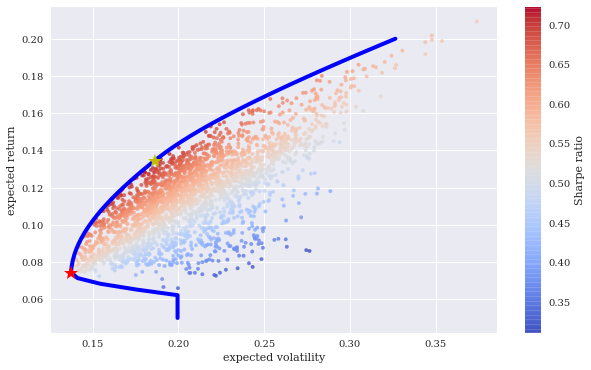

In [598]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_13.png')

### Capital Market Line

In [599]:
import scipy.interpolate as sci

In [600]:
ind = np.argmin(tvols)  
evols = tvols[ind:]  
erets = trets[ind:]  

In [601]:
tck = sci.splrep(evols, erets)  

In [602]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [603]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

In [604]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])  

In [605]:
opt  

array([0.01      , 0.67005195, 0.19212681])

In [606]:
np.round(equations(opt), 6)  

array([ 0., -0., -0.])

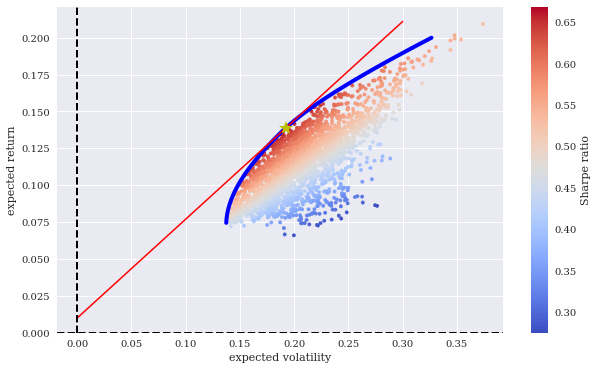

In [607]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_14.png')

In [608]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

In [609]:
res['x'].round(3)  

array([0.363, 0.637, 0.   , 0.   ])

In [610]:
port_ret(res['x'])

0.1387349456160954

In [611]:
port_vol(res['x'])

0.19212695080739717

In [612]:
port_ret(res['x']) / port_vol(res['x'])

0.722100387442124